In [1]:
# Pulls from API
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'10',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'c0cac866-7a22-4af7-a34e-45cb233ebbc4',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

# Need to enter "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10" into Anaconda Prompt to pull data

{'status': {'timestamp': '2022-08-30T17:15:58.640Z', 'error_code': 0, 'error_message': None, 'elapsed': 21, 'credit_count': 1, 'notice': None, 'total_count': 9618}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9712, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

In [2]:
import pandas as pd

# Displays all columns
pd.set_option('display.max_columns', None)

# Displays all rows
pd.set_option('display.max_rows', None)

In [3]:
# Normalizes data and converts it into a dataframe
df = pd.json_normalize(data['data'])

# Adds a timestamp column
df['timestamp'] = pd.Timestamp('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9712,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.913672e+07,1.913672e+07,NaN,1,None,None,None,2022-08-30T17:13:00.000Z,19655.256537,3.255205e+10,0.9515,-0.796172,-3.036794,-8.380634,-17.341304,1.511419,-35.097277,3.761371e+11,39.2865,4.127604e+11,None,2022-08-30T17:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-30 10:16:07.668097
1,1027,Ethereum,ETH,ethereum,6062,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.221729e+08,1.221729e+08,NaN,2,None,None,None,2022-08-30T17:13:00.000Z,1488.711567,1.919289e+10,6.3132,-2.525909,-2.823207,-9.047657,-12.965102,39.884227,-19.449262,1.818801e+11,19.0015,1.818801e+11,None,2022-08-30T17:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-30 10:16:07.668097
2,825,Tether,USDT,tether,39035,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.754976e+10,6.915678e+10,NaN,3,None,None,None,2022-08-30T17:13:00.000Z,1.000059,4.666804e+10,2.2729,-0.013569,0.002851,0.002604,-0.016324,0.103068,0.089000,6.755376e+10,7.0578,6.916087e+10,None,2022-08-30T17:13:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-08-30 10:16:07.668097
3,3408,USD Coin,USDC,usd-coin,6026,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.220479e+10,5.220479e+10,NaN,4,None,None,None,2022-08-30T17:13:00.000Z,0.999833,6.935278e+09,-60.9785,-0.017448,-0.011367,-0.004567,-0.031939,-0.023055,-0.028490,5.219609e+10,5.4533,5.219609e+10,None,2022-08-30T17:13:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-08-30 10:16:07.668097
4,1839,BNB,BNB,bnb,1091,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.613373e+08,1.613373e+08,NaN,5,None,None,None,2022-08-30T17:13:00.000Z,277.417026,9.453422e+08,-6.2722,-1.485039,-1.949732,-6.592919,-5.197947,28.223991,-8.382419,4.475770e+10,4.6760,5.548341e+10,None,2022-08-30T17:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-30 10:16:07.668097
5,4687,Binance USD,BUSD,binance-usd,4932,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.936133e+10,1.936133e+10,NaN,6,None,None,None,2022-08-30T17:13:00.000Z,1.000131,6.567944e+09,16.1136,-0.025017,-0.014347,-0.005630,-0.094451,-0.077310,-0.075767,1.936385e+10,2.0228,1.936385e+10,None,2022-08-30T17:13:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-08-30 10:16:07.668097
6,52,XRP,XRP,xrp,808,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",1.000000e+11,4.964649e+10,9.998932e+10,NaN,7,None,None,None,2022-08-30T17:13:00.000Z,0.321466,9.026184e+08,-10.0222,-1.082845,-2.170380,-6.097295,-18.212367,3.007824,-20.497705,1.595965e+10,1.6673,3.214658e+10,None,2022-08-30T17:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-30 10:16:07.668097
7,2010,Cardano,ADA,cardano,564,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.375257e+10,3.427770e+10,NaN,8,None,None,None,2022-08-30T17:13:00.000Z,0.441128,5.648326e+08,-14.3207,-1.275971,-1.329000,-3.737286,-17.732067,-1.425509,-21.973826,1.488920e+10,1.5551,1.985076e+10,None,2022-08-30T17:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-30 10:16:07.668097
8,5426,Solana,SOL,solana,372,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.495109e+08,

In [4]:
# Function that fetches the API and appends the data to the dataframe
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'10',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'c0cac866-7a22-4af7-a34e-45cb233ebbc4',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      # print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.Timestamp('now')
    df = pd.concat([df, df2])

In [5]:
import os 
from time import time
from time import sleep

# Runs api_runner function once per minute
for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) # Sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [6]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9712,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.913672e+07,1.913672e+07,NaN,1,None,None,None,2022-08-30T17:13:00.000Z,19655.256537,3.255205e+10,0.9515,-0.796172,-3.036794,-8.380634,-17.341304,1.511419,-35.097277,3.761371e+11,39.2865,4.127604e+11,None,2022-08-30T17:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-30 10:16:07.668097
1,1027,Ethereum,ETH,ethereum,6062,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.221729e+08,1.221729e+08,NaN,2,None,None,None,2022-08-30T17:13:00.000Z,1488.711567,1.919289e+10,6.3132,-2.525909,-2.823207,-9.047657,-12.965102,39.884227,-19.449262,1.818801e+11,19.0015,1.818801e+11,None,2022-08-30T17:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-30 10:16:07.668097
2,825,Tether,USDT,tether,39035,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.754976e+10,6.915678e+10,NaN,3,None,None,None,2022-08-30T17:13:00.000Z,1.000059,4.666804e+10,2.2729,-0.013569,0.002851,0.002604,-0.016324,0.103068,0.089000,6.755376e+10,7.0578,6.916087e+10,None,2022-08-30T17:13:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-08-30 10:16:07.668097
3,3408,USD Coin,USDC,usd-coin,6026,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.220479e+10,5.220479e+10,NaN,4,None,None,None,2022-08-30T17:13:00.000Z,0.999833,6.935278e+09,-60.9785,-0.017448,-0.011367,-0.004567,-0.031939,-0.023055,-0.028490,5.219609e+10,5.4533,5.219609e+10,None,2022-08-30T17:13:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-08-30 10:16:07.668097
4,1839,BNB,BNB,bnb,1091,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.613373e+08,1.613373e+08,NaN,5,None,None,None,2022-08-30T17:13:00.000Z,277.417026,9.453422e+08,-6.2722,-1.485039,-1.949732,-6.592919,-5.197947,28.223991,-8.382419,4.475770e+10,4.6760,5.548341e+10,None,2022-08-30T17:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-30 10:16:07.668097
5,4687,Binance USD,BUSD,binance-usd,4932,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.936133e+10,1.936133e+10,NaN,6,None,None,None,2022-08-30T17:13:00.000Z,1.000131,6.567944e+09,16.1136,-0.025017,-0.014347,-0.005630,-0.094451,-0.077310,-0.075767,1.936385e+10,2.0228,1.936385e+10,None,2022-08-30T17:13:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-08-30 10:16:07.668097
6,52,XRP,XRP,xrp,808,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",1.000000e+11,4.964649e+10,9.998932e+10,NaN,7,None,None,None,2022-08-30T17:13:00.000Z,0.321466,9.026184e+08,-10.0222,-1.082845,-2.170380,-6.097295,-18.212367,3.007824,-20.497705,1.595965e+10,1.6673,3.214658e+10,None,2022-08-30T17:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-30 10:16:07.668097
7,2010,Cardano,ADA,cardano,564,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.375257e+10,3.427770e+10,NaN,8,None,None,None,2022-08-30T17:13:00.000Z,0.441128,5.648326e+08,-14.3207,-1.275971,-1.329000,-3.737286,-17.732067,-1.425509,-21.973826,1.488920e+10,1.5551,1.985076e+10,None,2022-08-30T17:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-30 10:16:07.668097
8,5426,Solana,SOL,solana,372,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.495109e+08,

In [7]:
# Converts scientific notation to float format
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [19]:
df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9712,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19136718.00000,19136718.00000,NaN,1,None,None,None,2022-08-30T17:13:00.000Z,19655.25654,32552054849.43677,0.95150,-0.79617,-3.03679,-8.38063,-17.34130,1.51142,-35.09728,376137101572.17322,39.28650,412760387283.53003,None,2022-08-30T17:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-30 10:16:07.668097
1,1027,Ethereum,ETH,ethereum,6062,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,122172855.12400,122172855.12400,NaN,2,None,None,None,2022-08-30T17:13:00.000Z,1488.71157,19192891162.43668,6.31320,-2.52591,-2.82321,-9.04766,-12.96510,39.88423,-19.44926,181880142623.97647,19.00150,181880142623.98001,None,2022-08-30T17:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-30 10:16:07.668097
2,825,Tether,USDT,tether,39035,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,67549764120.36389,69156782826.58534,NaN,3,None,None,None,2022-08-30T17:13:00.000Z,1.00006,46668044751.96644,2.27290,-0.01357,0.00285,0.00260,-0.01632,0.10307,0.08900,67553757040.11082,7.05780,69160870738.47000,None,2022-08-30T17:13:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-08-30 10:16:07.668097
3,3408,USD Coin,USDC,usd-coin,6026,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,52204787147.60657,52204787147.60657,NaN,4,None,None,None,2022-08-30T17:13:00.000Z,0.99983,6935278323.07844,-60.97850,-0.01745,-0.01137,-0.00457,-0.03194,-0.02305,-0.02849,52196092834.06158,5.45330,52196092834.06000,None,2022-08-30T17:13:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-08-30 10:16:07.668097
4,1839,BNB,BNB,bnb,1091,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,161337261.09000,161337261.09000,NaN,5,None,None,None,2022-08-30T17:13:00.000Z,277.41703,945342211.30307,-6.27220,-1.48504,-1.94973,-6.59292,-5.19795,28.22399,-8.38242,44757703106.48226,4.67600,55483405140.38000,None,2022-08-30T17:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-30 10:16:07.668097


In [9]:
# Displays cryptocurrency trends over time
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.92568,-3.03161,-8.43541,-17.36281,1.38054,-35.11407
Ethereum,-2.75521,-2.88480,-9.18632,-13.07685,39.59545,-19.55730
Tether,-0.01726,0.00155,0.00420,-0.01765,0.10153,0.08864
USD Coin,-0.03216,-0.01652,-0.01107,-0.02789,-0.03257,-0.03659
BNB,-1.57160,-1.96976,-6.65463,-5.23486,28.09593,-8.44243
Binance USD,-0.03377,-0.00954,-0.00817,-0.07249,-0.08362,-0.07381
XRP,-1.21641,-2.16382,-6.11298,-18.27360,2.95512,-20.53824
Cardano,-1.33171,-1.30209,-3.73209,-17.76847,-1.47593,-21.92552
Solana,-1.07244,-2.59720,-12.65205,-30.14121,-5.43139,-27.17147


In [10]:
# Stacks cryptocurrency trends over time
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.92568
             quote.USD.percent_change_24h    -3.03161
             quote.USD.percent_change_7d     -8.43541
             quote.USD.percent_change_30d   -17.36281
             quote.USD.percent_change_60d     1.38054
             quote.USD.percent_change_90d   -35.11407
Ethereum     quote.USD.percent_change_1h     -2.75521
             quote.USD.percent_change_24h    -2.88480
             quote.USD.percent_change_7d     -9.18632
             quote.USD.percent_change_30d   -13.07685
             quote.USD.percent_change_60d    39.59545
             quote.USD.percent_change_90d   -19.55730
Tether       quote.USD.percent_change_1h     -0.01726
             quote.USD.percent_change_24h     0.00155
             quote.USD.percent_change_7d      0.00420
             quote.USD.percent_change_30d    -0.01765
             quote.USD.percent_change_60d     0.10153
             quote.USD.percent_change_90

In [18]:
# Adds column name of 'values'
df5 = df4.to_frame(name='values')
df5.head()

values
name                                          
Bitcoin quote.USD.percent_change_1h   -0.92568
        quote.USD.percent_change_24h  -3.03161
        quote.USD.percent_change_7d   -8.43541
        quote.USD.percent_change_30d -17.36281
        quote.USD.percent_change_60d   1.38054

In [12]:
# Counts total rows
df5.count()

values    60
dtype: int64

In [15]:
# Adds an index for each row
index = pd.Index(range(60))

# Resets the index
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.92568
1,Bitcoin,quote.USD.percent_change_24h,-3.03161
2,Bitcoin,quote.USD.percent_change_7d,-8.43541
3,Bitcoin,quote.USD.percent_change_30d,-17.36281
4,Bitcoin,quote.USD.percent_change_60d,1.38054
5,Bitcoin,quote.USD.percent_change_90d,-35.11407
6,Ethereum,quote.USD.percent_change_1h,-2.75521
7,Ethereum,quote.USD.percent_change_24h,-2.88480
8,Ethereum,quote.USD.percent_change_7d,-9.18632
9,Ethereum,quote.USD.percent_change_30d,-13.07685


In [17]:
# Changes column name from 'level_1' to 'percent_change'
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7.head()

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.92568
1,Bitcoin,quote.USD.percent_change_24h,-3.03161
2,Bitcoin,quote.USD.percent_change_7d,-8.43541
3,Bitcoin,quote.USD.percent_change_30d,-17.36281
4,Bitcoin,quote.USD.percent_change_60d,1.38054


In [21]:
# Changes names under 'percent_change' column
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'],['1h', '24h', '7d', '30d', '60d', '90d'])
df7.head()

,name,percent_change,values
0,Bitcoin,1h,-0.92568
1,Bitcoin,24h,-3.03161
2,Bitcoin,7d,-8.43541
3,Bitcoin,30d,-17.36281
4,Bitcoin,60d,1.38054


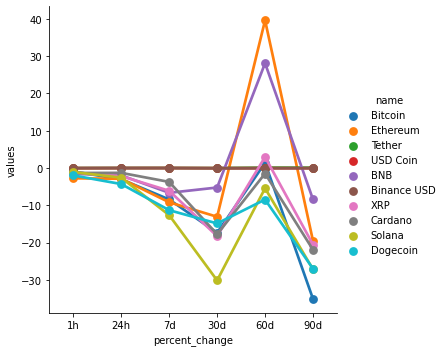

In [22]:
# Displays cryptocurrency trends over last 90 days
import seaborn as sns

sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [35]:
# Displays Bitcoin price over time
df8 = df[['name', 'quote.USD.price', 'timestamp']]
df8 = df8.query("name == 'Bitcoin'")
df8

,name,quote.USD.price,timestamp
0,Bitcoin,19655.25654,2022-08-30 10:16:07.668097
0,Bitcoin,19655.25654,2022-08-30 10:16:08.532665
0,Bitcoin,19651.64396,2022-08-30 10:17:08.849027
0,Bitcoin,19642.94330,2022-08-30 10:18:11.009973
0,Bitcoin,19632.35917,2022-08-30 10:19:11.316765
0,Bitcoin,19634.40193,2022-08-30 10:20:11.685381
